In [65]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def read_data_from_csv(path):
    df = pd.read_csv(path)
    X = df["sequence"].values
    y = df["label"].values
    return X, y

In [20]:
phylum_data_base_path = "../data/hierarchy/phylum"

phylum_train_sequences, phylum_train_labels = read_data_from_csv(os.path.join(phylum_data_base_path, "train.csv"))
phylum_val_sequences, phylum_val_labels = read_data_from_csv(os.path.join(phylum_data_base_path, "val.csv"))
phylum_test_sequences, phylum_test_labels = read_data_from_csv(os.path.join(phylum_data_base_path, "test.csv"))

In [28]:
a = list(map(lambda x: len(x), phylum_train_sequences))

print("DNA Sequence Length Statistics:")
print("Max:", np.max(a))
print("Min:", np.min(a))
print("Mean:", np.ceil(np.mean(a)))
print("Median:", np.ceil(np.median(a)))
print("Sqrt of Max:", np.ceil(np.sqrt(np.max(a))))

DNA Sequence Length Statistics:
Max: 1370
Min: 1270
Mean: 1350.0
Median: 1348.0
Sqrt of Max: 38.0


In [29]:
IMAGE_WIDTH = IMAGE_HEIGHT = 38  # 1444 length zero-padded DNA sequences
IMAGE_CHANNELS = 4  # A, C, G, T

In [62]:
base_pair_map = {
    'A': [1, 0, 0, 0],
    'C': [0, 1, 0, 0],
    'G': [0, 0, 1, 0],
    'T': [0, 0, 0, 1]
}

def seqeunces_to_image(sequences):
    image = np.zeros((len(sequences), IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
    for i, sequence in enumerate(sequences):
        for loc, base_pair in enumerate(sequence):
            row = loc // IMAGE_HEIGHT
            col = loc % IMAGE_HEIGHT
            image[i, row, col] = base_pair_map[base_pair]
    return image

In [63]:
phylum_train_data = seqeunces_to_image(phylum_train_sequences)
phylum_val_data = seqeunces_to_image(phylum_val_sequences)
phylum_test_data = seqeunces_to_image(phylum_test_sequences)

In [95]:
base_pair_colors = {
    (1, 0, 0, 0): [183, 28, 28],  # red
    (0, 1, 0, 0): [174, 234, 0],  # green
    (0, 0, 1, 0): [0, 145, 234],  # blue
    (0, 0, 0, 1): [255, 111, 0],  # orange
    (0, 0, 0, 0): [33, 33, 33]   # black
}

def viz_dna_image(dna_image):
    dna_rgb_image = np.zeros((IMAGE_WIDTH, IMAGE_HEIGHT, 3))
    for i, row in enumerate(dna_image):
        for j, col in enumerate(row):
            dna_rgb_image[i][j] = base_pair_colors[tuple(col)]
    plt.imshow(dna_rgb_image/255.0)

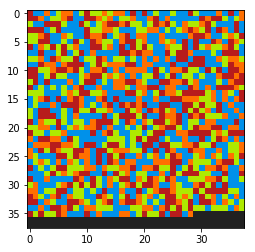

In [99]:
viz_dna_image(phylum_train_data[100])

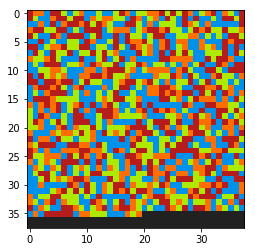

In [100]:
viz_dna_image(phylum_train_data[1000])